## preprocessing

In [1]:
!pip3 install dgl

In [2]:
!pip install dglgo

In [3]:
%matplotlib inline
import os

os.environ["DGLBACKEND"] = "pytorch"
import dgl
import numpy as np
import networkx as nx
import torch
import torch.nn as nn
import dgl.function as fn
import torch.nn.functional as F

# Temporary

In [4]:
src_ids = torch.tensor([1, 1, 2, 3])
dst_ids = torch.tensor([2, 3, 3, 4])
g = dgl.graph((src_ids, dst_ids))
print(g)

Graph(num_nodes=5, num_edges=4,
      ndata_schemes={}
      edata_schemes={})


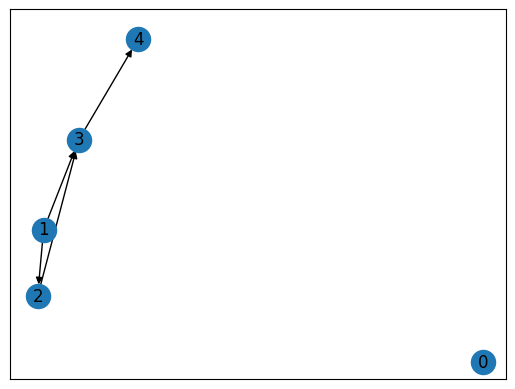

In [5]:
nx.draw_networkx(g.to_networkx(), with_labels = True)

In [6]:
g.ndata['x'] = torch.randint(10, (5, 2))
g.ndata

{'x': tensor([[1, 9],
        [1, 5],
        [8, 1],
        [7, 9],
        [4, 8]])}

In [7]:
g.edata['w'] = torch.randint(10, (4, 2))
g.edata

{'w': tensor([[1, 4],
        [7, 6],
        [3, 9],
        [4, 5]])}

## Part 1

In [8]:
# apply nodes
def f_n(n):
  return {'y': n.data['x']+3}
g.apply_nodes(f_n)
g.ndata['y']

tensor([[ 4, 12],
        [ 4,  8],
        [11,  4],
        [10, 12],
        [ 7, 11]])

In [9]:
# apply nodes
def f_n(n):
  return {'z': n.data['x']*2 +1}
g.apply_nodes(f_n)
g.ndata['z']

tensor([[ 3, 19],
        [ 3, 11],
        [17,  3],
        [15, 19],
        [ 9, 17]])

In [10]:
# apply edges
def f_e(e):
  return {'k': e.data['w']*2 + 2}
g.apply_edges(f_e)
g.edata['k']

tensor([[ 4, 10],
        [16, 14],
        [ 8, 20],
        [10, 12]])

In [11]:
# apply edges
def f_e(e):
  return {'t': e.data['w'] + 4}
g.apply_edges(f_e)
g.edata['t']

tensor([[ 5,  8],
        [11, 10],
        [ 7, 13],
        [ 8,  9]])

In [12]:
g.ndata

{'x': tensor([[1, 9],
        [1, 5],
        [8, 1],
        [7, 9],
        [4, 8]]), 'y': tensor([[ 4, 12],
        [ 4,  8],
        [11,  4],
        [10, 12],
        [ 7, 11]]), 'z': tensor([[ 3, 19],
        [ 3, 11],
        [17,  3],
        [15, 19],
        [ 9, 17]])}

In [16]:
g.edata

{'w': tensor([[1, 4],
        [7, 6],
        [3, 9],
        [4, 5]]), 'k': tensor([[ 4, 10],
        [16, 14],
        [ 8, 20],
        [10, 12]]), 't': tensor([[ 5,  8],
        [11, 10],
        [ 7, 13],
        [ 8,  9]])}

In [14]:
h = dgl.graph(([0, 1, 2, 3], [1, 2, 3, 4]))
h.ndata['x'] = torch.ones(5, 2)
h.send_and_recv(([1, 2, 3], [2, 3, 4]), fn.copy_u('x', 'm'), fn.sum('m', 'h'))
h.ndata['h']

tensor([[0., 0.],
        [0., 0.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [22]:
g1 = dgl.graph(([0, 1, 2, 3], [1, 2, 3, 4]))
g1.ndata['x'] = torch.ones(5, 3)
g1.pull([0, 1, 2], fn.copy_u('x', 'm'), fn.sum('m', 'h'))
g1.ndata['h']

tensor([[0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [23]:
g1.update_all(fn.copy_u('x', 'm'), fn.sum('m', 'h'))
g1.ndata['h']

tensor([[0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

## Part 2

In [26]:
f = dgl.graph(([0, 1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6, 7]))

In [31]:
f.ndata['x'] = torch.ones(8,3)
f.edata['y'] = torch.ones(7,3)
print(f.ndata['x'])
print(f.edata['y'])

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [33]:
message_func_f1 = dgl.function.copy_u('x', 'm')
message_func_f1

In [34]:
message_func_f1_2 = dgl.function.copy_e('y', 'm')
message_func_f1_2

In [35]:
message_func_u_add_v = dgl.function.u_add_v('x', 'y', 'm')
message_func_u_mul_v = dgl.function.u_mul_v('x', 'y', 'm')



In [36]:
message_func_v_add_e = dgl.function.v_add_e('x', 'y', 'm')
message_func_v_mul_e = dgl.function.v_mul_e('x', 'y', 'm')


In [38]:
message_func_v_add_u = dgl.function.v_add_u('x', 'y', 'm')
message_func_v_mul_u = dgl.function.v_mul_u('x', 'y', 'm')


In [39]:
message_func_u_add_e = dgl.function.u_add_e('x', 'y', 'm')
message_func_u_mul_e = dgl.function.u_mul_e('x', 'y', 'm')
